<a href="https://colab.research.google.com/github/ayaramis/DataScience/blob/main/Capstone_Project_4_Student_(Adult_Income_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load Data

In [3]:
df0 = pd.read_csv('adult.csv')
df = df0.copy()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Exploratory Data Analysis

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
numeric = df.select_dtypes(exclude=object)
categoric = df.select_dtypes(include=object)

In [15]:
# Check unique values in categoric features
for i in categoric:
    print(i.upper())
    print('---'*30)
    print(df[i].unique())
    print('==='*30)

WORKCLASS
------------------------------------------------------------------------------------------
[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
EDUCATION
------------------------------------------------------------------------------------------
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
MARITAL.STATUS
------------------------------------------------------------------------------------------
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
OCCUPATION
------------------------------------------------------------------------------------------
[nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-suppo

In [13]:
# There are  ? in the data, so needs to be replaced by NaN to process it.
df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [16]:
for i in categoric:
    print(i.upper())
    print('---'*30)
    print(df[i].unique())
    print('==='*30)

WORKCLASS
------------------------------------------------------------------------------------------
[nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
EDUCATION
------------------------------------------------------------------------------------------
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
MARITAL.STATUS
------------------------------------------------------------------------------------------
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
OCCUPATION
------------------------------------------------------------------------------------------
[nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-suppo

In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [18]:
# There are null values and needs to handle
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [19]:
# Since the
df.dropna(how='any', inplace=True)

In [26]:
print(f'initial shape: ',df0.shape)
print('final shape: ',df.shape)

initial shape:  (32561, 15)
final shape:  (30162, 15)


In [28]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education.num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital.gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital.loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours.per.week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [29]:
categoric.describe().T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [30]:
df.income.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

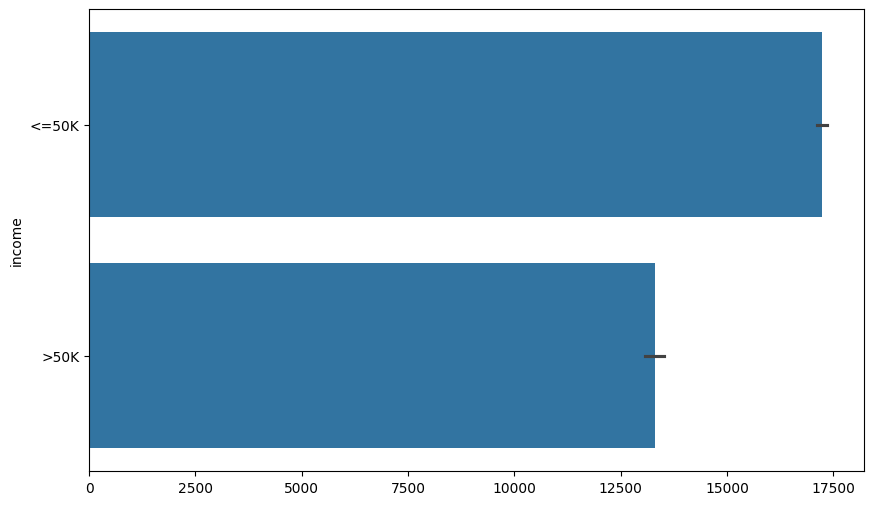

In [38]:
sns.barplot(df.income);

In [39]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [40]:
num_features = numeric.columns
cat_features = categoric.columns

In [41]:
cat_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [42]:
X = df.drop(columns = 'income', axis=1)
y = df.income

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Preprocessiong for Numeric Features
numerical_transformer = Pipeline(steps=[
     #('imputer', SimpleImputer(strategy='mean')),  # Eksik veri doldurma
   ('scaler', StandardScaler())]) # Özellik ölçeklendirme

# Preprocessiong for Categorical Features
categorical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Eksik veri doldurma
     ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # One-hot encoding



# ColumnTransformer ile farklı türdeki özellikler için ön işleme
preprocessor = ColumnTransformer(
   transformers=[
        ('num', numerical_transformer, num_features),
       ('cat', categorical_transformer, cat_features)
    ])



In [ ]:
# Pipeline for Logistic Regression
steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # En iyi 10 özelliği seçme
    ('LogisticRegression', LogisticRegression())
]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {
    'LogisticRegression__C': np.logspace(-1, 5, 20),
    'LogisticRegression__penalty': ["l1", "l2"]}

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring = "f1_micro")

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir
# Örneğin: pipe_grid.fit(X_train, y_train)

In [ ]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital.status',
                                                                          'occup...
             param_grid={'LogisticRegression__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'LogisticRegression__penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [ ]:
pipe_grid.best_params_

{'LogisticRegression__C': 0.1, 'LogisticRegression__penalty': 'l2'}

In [ ]:
pipe_model.set_params(LogisticRegression__C = 0.1, LogisticRegression__penalty =  'l2')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('feature_selection', SelectKBest()),
                ('LogisticRegression', LogisticRegression(C=0.1))])

In [ ]:
y_pred = pipe_grid.predict(X_test)
y_pred

array(['>50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4222  309]
 [ 663  839]]
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      4531
        >50K       0.73      0.56      0.63      1502

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.76      6033
weighted avg       0.83      0.84      0.83      6033


Train_Set
[[16812  1311]
 [ 2673  3333]]
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     18123
        >50K       0.72      0.55      0.63      6006

    accuracy                           0.83     24129
   macro avg       0.79      0.74      0.76     24129
weighted avg       0.83      0.83      0.83     24129



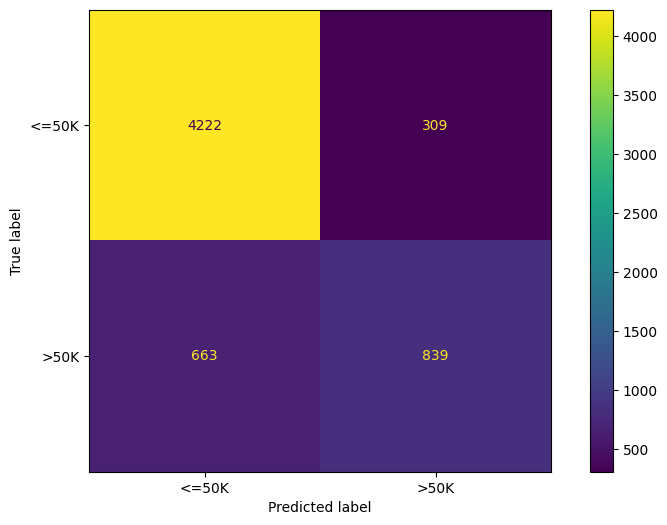

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe_grid, X_test, y_test);

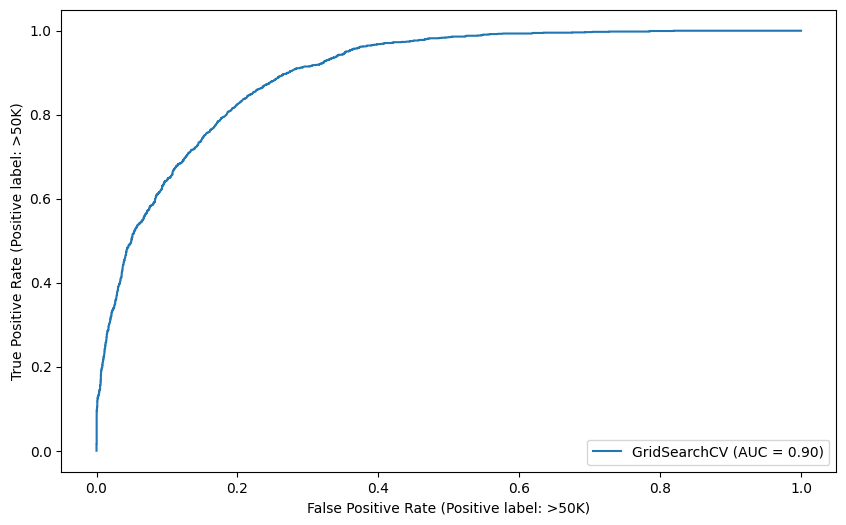

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe_grid, X_test, y_test);

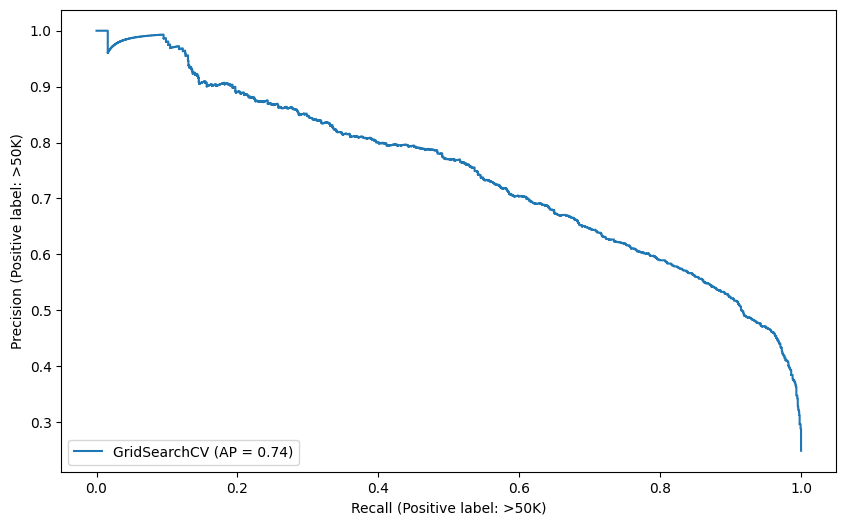

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(pipe_grid, X_test, y_test);

# K-Nearest Neighbors (KNN) Classification

In [ ]:
# Pipeline for KNN
steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=10)),  # En iyi 10 özelliği seçme
    ('KNN', KNeighborsClassifier())
]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {"KNN__n_neighbors":range(1, 30),
              "KNN__p": [1, 2],
              "KNN__weights": ["uniform", "distance"]}

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring = "f1_micro")

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir
# Örneğin: pipe_grid.fit(X_train, y_train)

In [ ]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital.status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native.country'])])),
                                       ('feature_selection', SelectKBest()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__n_neighbors': range(1, 30), 'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [ ]:
pipe_grid.best_params_

{'KNN__n_neighbors': 21, 'KNN__p': 2, 'KNN__weights': 'uniform'}

In [ ]:
pipe_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('feature_selection', SelectKBest()),
                ('KNN', KNeighborsClassifier(n_neighbors=21))])

In [ ]:
pipe_model.set_params(KNN__n_neighbors= 21, KNN__p= 2, KNN__weights= 'uniform')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('feature_selection', SelectKBest()),
                ('KNN', KNeighborsClassifier(n_neighbors=21))])

In [ ]:
y_pred = pipe_grid.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [ ]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4208  323]
 [ 640  862]]
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4531
        >50K       0.73      0.57      0.64      1502

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033


Train_Set
[[16865  1258]
 [ 2356  3650]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     18123
        >50K       0.74      0.61      0.67      6006

    accuracy                           0.85     24129
   macro avg       0.81      0.77      0.79     24129
weighted avg       0.84      0.85      0.84     24129



Logistic Regression
![image.png](attachment:image.png)

# Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
numerical_transformer = Pipeline(steps=[
     #('imputer', SimpleImputer(strategy='mean')),  # Eksik veri doldurma
   ('scaler', StandardScaler())]) # Özellik ölçeklendirme

# Preprocessiong for Categorical Features
categorical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Eksik veri doldurma
     ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # One-hot encoding



# ColumnTransformer ile farklı türdeki özellikler için ön işleme
preprocessor = ColumnTransformer(
   transformers=[
        ('num', numerical_transformer, num_features),
       ('cat', categorical_transformer, cat_features)
    ])

In [ ]:
# Pipeline for SVM

steps = [('preprocessor', preprocessor),
        ('SVC', SVC())]
#SelectKBest bir özellik seçme yöntemidir ve f_classif bir skorlama fonksiyonudur. Bu fonksiyon, özelliklerin sınıflandırma #problemlerindeki önemini değerlendirmek için kullanılır. f_classif, ANOVA F-testi istatistiklerini kullanarak her özelliğin #hedef değişkene olan ilişkisini değerlendirir. Bu sayede, en önemli özelliklerin seçilmesine yardımcı olur. Burada k=2, en iyi #10 özelliğin seçileceğini belirtir. Yani, en iyi 10 özelliği seçmek için ANOVA F-testi istatistiğine dayanarak bir değerlendirme #yapılacaktır. Bu sayede, modelin daha iyi performans göstermesi amaçlanır.
pipe_model = Pipeline(steps=steps)

# GridSearchCV için parametre grid'i
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1, 1.0],
             "SVC__kernel": ["rbf", "linear"],
             "SVC__gamma": ["scale", "auto", 0.2, 0.3]}

pipe_grid_SVM = GridSearchCV(estimator=pipe_model, param_grid=param_grid, cv=10, scoring = "f1", n_jobs=-1)

# Modelin eğitilmesi ve en iyi parametrelerin belirlenmesi için verilerinizin burada olması gerekir

In [ ]:
pipe_grid_SVM.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                             

In [ ]:
pipe_grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education.num',
                                                                          'capital.gain',
                                                                          'capital.loss',
                                                                          'hours.per.week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital.status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native.country'])])),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1, 1.0],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='f1')

In [ ]:
pipe_grid_SVM.best_params_

{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [ ]:
pipe_model.set_params(SVC__C=0.001, SVC__gamma= 'scale', SVC__kernel =  'rbf')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('SVC', SVC(C=0.001))])

In [ ]:
eval_metric(pipe_grid_SVM, X_train, y_train, X_test, y_test)

Test_Set
[[4531    0]
 [1502    0]]
              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      4531
        >50K       0.00      0.00      0.00      1502

    accuracy                           0.75      6033
   macro avg       0.38      0.50      0.43      6033
weighted avg       0.56      0.75      0.64      6033


Train_Set
[[18123     0]
 [ 6006     0]]
              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     18123
        >50K       0.00      0.00      0.00      6006

    accuracy                           0.75     24129
   macro avg       0.38      0.50      0.43     24129
weighted avg       0.56      0.75      0.64     24129

